**Task 1: Student Score Prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv("data_1.csv")

In [ ]:
print(data)

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                     

**DATA PREPROCESSING**

In [ ]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [ ]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

**Converting non-numeric_columns into numeric**





In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in data.select_dtypes(include='object').columns:
  if col!= 'Exam_score':
    le=LabelEncoder()
    data[col]=LabelEncoder().fit_transform(data[col])
    #print(col)
data.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


**checking correlation with target i.e Exam_Score**

In [ ]:
correlation=data.corr(numeric_only=True)['Exam_Score'].sort_values(ascending=False)
print(correlation)


Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Distance_from_Home            0.083944
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Parental_Education_Level      0.040381
Physical_Activity             0.027824
Gender                       -0.002032
School_Type                  -0.008844
Motivation_Level             -0.014910
Sleep_Hours                  -0.017022
Family_Income                -0.026484
Teacher_Quality              -0.061772
Learning_Disabilities        -0.085066
Access_to_Resources          -0.090503
Parental_Involvement         -0.094289
Name: Exam_Score, dtype: float64


**Displaying correlation**

/tmp/ipython-input-1594439804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')


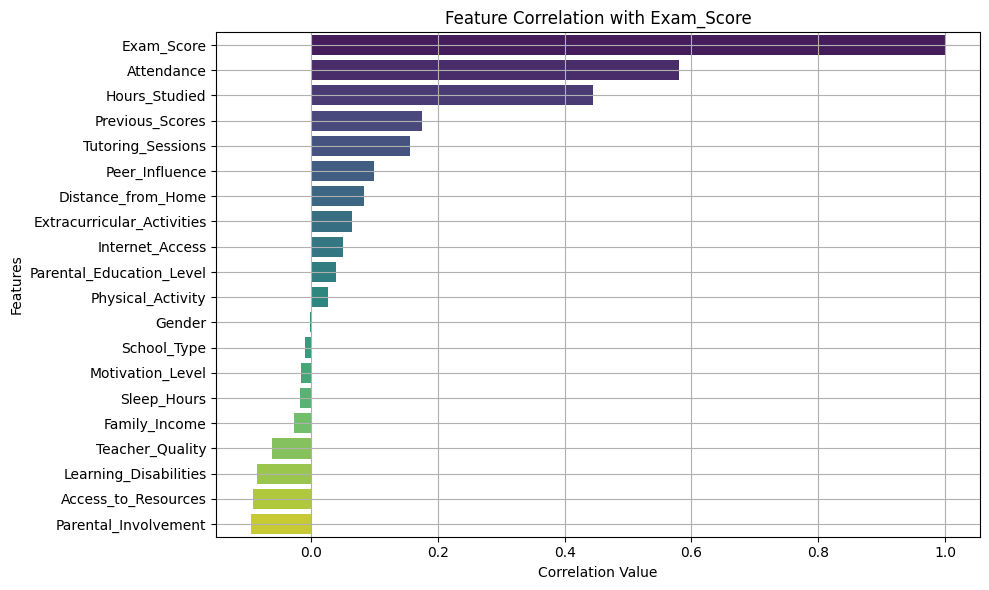

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Feature Correlation with Exam_Score')
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()

**Based on correlation removing columns from dataset**

In [ ]:
'''
cols_to_drop = [
    'Gender', 'School_Type',
    'Motivation_Level', 'Sleep_Hours', 'Family_Income', 'Teacher_Quality',
    'Learning_Disabilities', 'Access_to_Resources', 'Parental_Involvement'
]

# Safely drop only existing columns, and apply changes directly to data
data.drop(columns=[col for col in cols_to_drop if col in data.columns], inplace=True)
print(data.columns)
'''

cols_to_drop = [
    'Distance_from_Home', 'Extracurricular_Activities', 'Internet_Access',
    'Parental_Education_Level', 'Physical_Activity', 'Gender', 'School_Type',
    'Motivation_Level', 'Sleep_Hours', 'Family_Income', 'Teacher_Quality',
    'Learning_Disabilities', 'Access_to_Resources', 'Parental_Involvement'
]

# Safely drop only existing columns, and apply changes directly to data
data.drop(columns=[col for col in cols_to_drop if col in data.columns], inplace=True)


In [ ]:
data.head()

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Peer_Influence,Exam_Score
0,23,84,73,0,2,67
1,19,64,59,2,0,61
2,24,98,91,2,1,74
3,29,89,98,1,0,71
4,19,92,65,3,1,70


In [ ]:
print(data.isnull().sum())


Hours_Studied        0
Attendance           0
Previous_Scores      0
Tutoring_Sessions    0
Peer_Influence       0
Exam_Score           0
dtype: int64


**Checking  Outliers**

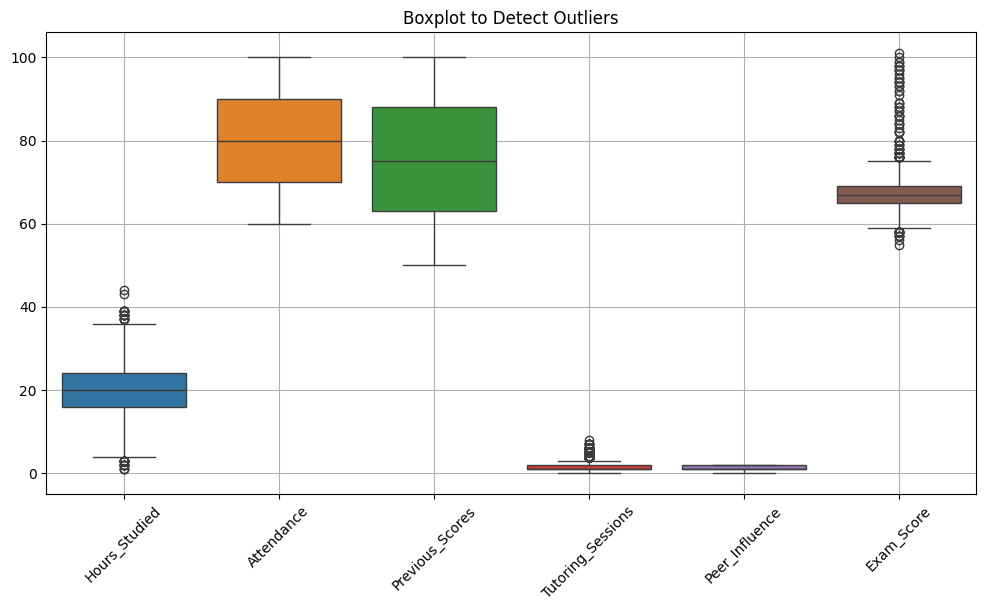

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.grid(True)
plt.show()


**Removing  Outliers**

In [ ]:
Q1 = data['Hours_Studied'].quantile(0.25)
Q3 = data['Hours_Studied'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data=data[(data['Hours_Studied'] >= lower_bound) & (data['Hours_Studied'] <= upper_bound)]

'''
Q1 = data['Internet_Access'].quantile(0.25)
Q3 = data['Internet_Access'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data=data[(data['Internet_Access'] >= lower_bound) & (data['Internet_Access'] <= upper_bound)]
'''

Q1 = data['Tutoring_Sessions'].quantile(0.25)
Q3 = data['Tutoring_Sessions'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data=data[(data['Tutoring_Sessions'] >= lower_bound) & (data['Tutoring_Sessions'] <= upper_bound)]


Q1 = data['Exam_Score'].quantile(0.25)
Q3 = data['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data=data[(data['Exam_Score'] >= lower_bound) & (data['Exam_Score'] <= upper_bound)]


'''
Q1 = data['Parental_Education_Level'].quantile(0.25)
Q3 = data['Parental_Education_Level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data=data[(data['Parental_Education_Level'] >= lower_bound) & (data['Parental_Education_Level'] <= upper_bound)]
'''


"\nQ1 = data['Parental_Education_Level'].quantile(0.25)\nQ3 = data['Parental_Education_Level'].quantile(0.75)\nIQR = Q3 - Q1\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\ndata=data[(data['Parental_Education_Level'] >= lower_bound) & (data['Parental_Education_Level'] <= upper_bound)]\n"

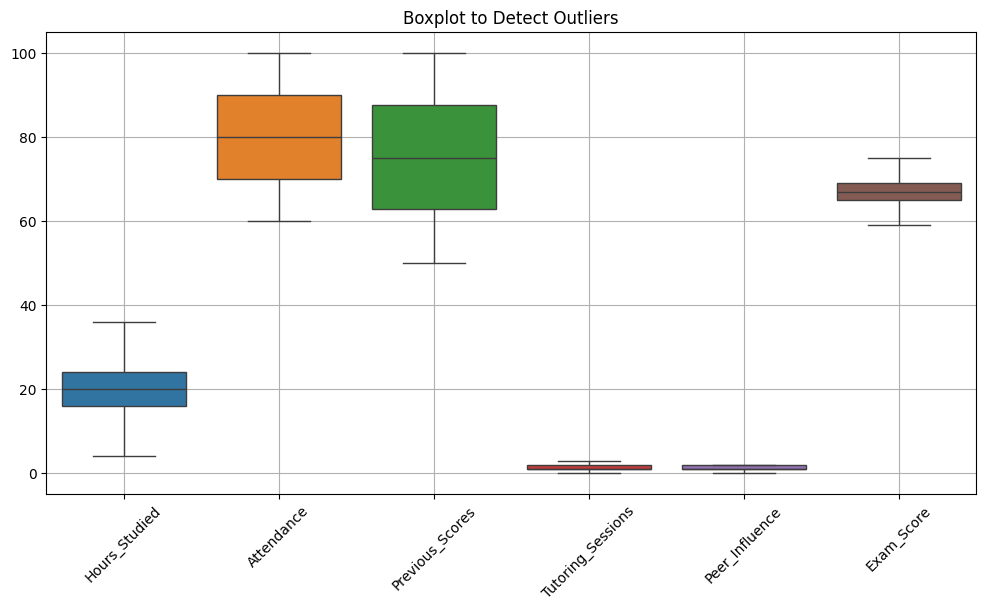

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Boxplot to Detect Outliers")
plt.grid(True)
plt.show()


**Split the dataset into training and testing set**

In [ ]:
X=data.drop(columns=['Exam_Score'])
y=data['Exam_Score']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Train a linear regression model to estimate final score**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly_model= make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


In [ ]:
poly_model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred_poly = poly_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial MSE: {mse_poly}")
print(f"Polynomial R² Score: {r2_poly}")


Polynomial MSE: 1.996469791831566
Polynomial R² Score: 0.8009445727707197


**Checking model performance**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame comparing actual vs predicted
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_poly
})

# Add an error column (optional)
results_df['Error'] = results_df['Actual'] - results_df['Predicted']

# View the first few rows
print(results_df.head())


      Actual  Predicted     Error
6003      68  65.926133  2.073867
652       70  68.891707  1.108293
2909      65  67.240669 -2.240669
3375      67  65.604230  1.395770
3143      61  62.238228 -1.238228


In [ ]:
accuracy = r2_poly * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 80.09%


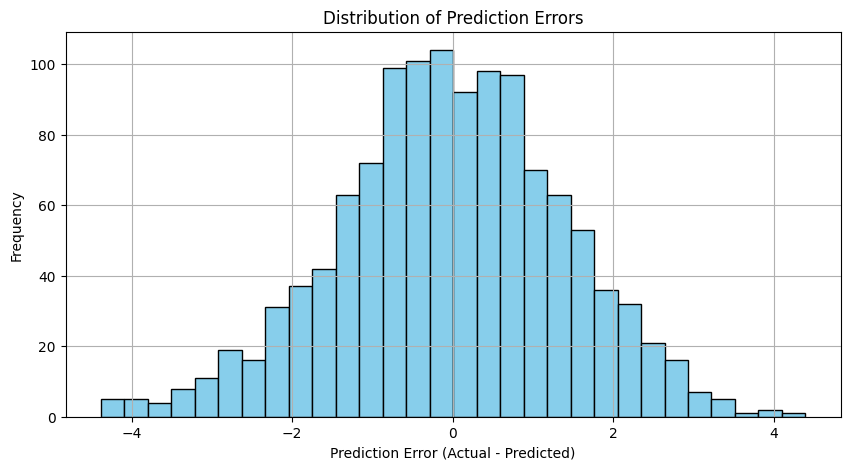

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(results_df['Error'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


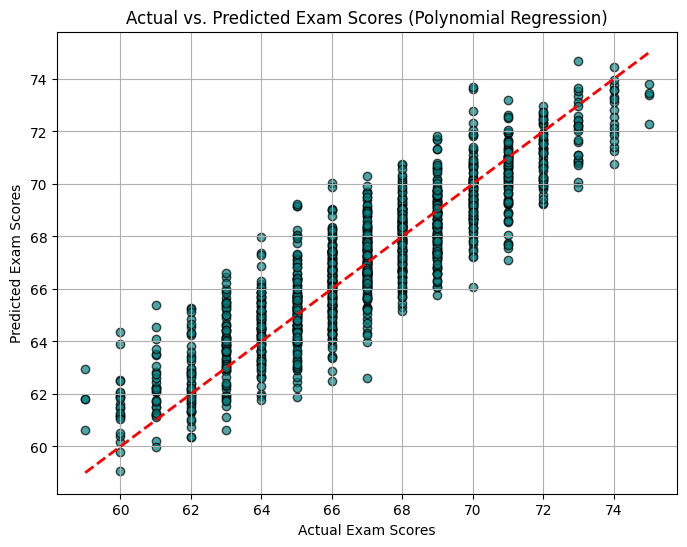

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, color='teal', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs. Predicted Exam Scores (Polynomial Regression)')
plt.grid(True)
plt.show()
